In [110]:
#a: Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us by this course
#Jupyter Lab 3.44, Python 3
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D209\churn_clean.csv')

#Ignore warning messages (These are NOT error messages)
import warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Baisc math imports
import numpy as np
from pandas import DataFrame

#For univariatre and bivariate analysis/visualizations
import seaborn as sb
import matplotlib.pyplot as mpl
%matplotlib inline

#Scikit-learn for KNN classification
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [111]:
#b: Let's view the dataset and print various information that will give us an overview
print("Floats")
print(churn_df.select_dtypes(include="float").info())

print("Integers")
print(churn_df.select_dtypes(include="integer").info())

print("Objects")
print(churn_df.select_dtypes(include="object").info())

print("Dataset Information")
print(churn_df.info)

Floats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
Integers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non

In [112]:
#c: Rename the header for items 1-8 to show a better description according to the data dictionary because the eight survey items were not labeled properly and need to fixed
churn_df.rename(columns = 
{'Item1':'item1_responses',
'Item2':'item2_fixes',
'Item3':'item3_replacements',
'Item4':'item4_reliability',
'Item5':'item5_options',
'Item6':'item6_respectfulness',
'Item7':'item7_courteous',
'Item8':'item8_listening'},
inplace=True)

In [113]:
#d: Check for any missing values
churn_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [114]:
#e: Replace categorical values to numeric values
churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['Area_numeric'] = churn_df['Area']
dict_Area = {"Area_numeric": {"Urban": 0, "Suburban": 1, "Rural": 2}}
churn_df.replace(dict_Area, inplace=True)

churn_df['Marital_numeric'] = churn_df['Marital']
dict_Marital = {"Marital_numeric": {"Widowed": 0, "Married": 1, "Separated": 2, "Never Married": 3, "Divorced": 4}}
churn_df.replace(dict_Marital, inplace=True)

churn_df['Gender_numeric'] = churn_df['Gender']
dict_Gender = {"Gender_numeric": {"Male": 0, "Female": 1, "Prefer not to answer": 2, "Nonbinary": 3}}
churn_df.replace(dict_Gender, inplace=True)

churn_df['Contract_numeric'] = churn_df['Contract']
dict_Contract = {"Contract_numeric": {"One year": 0, "Month-to-month": 1, "Two Year": 2}}
churn_df.replace(dict_Contract, inplace=True)

churn_df['PaymentMethod_numeric'] = churn_df['PaymentMethod']
dict_PaymentMethod = {"PaymentMethod_numeric": {"Credit Card (automatic)": 0, "Bank Transfer(automatic)": 1, "Mailed Check": 2, "Electronic Check": 3}}
churn_df.replace(dict_PaymentMethod, inplace=True)

churn_df['InternetService_numeric'] = churn_df['InternetService']
dict_InternetService = {"InternetService_numeric": {"Fiber Optic": 0, "DSL": 1, "None": 2}}
churn_df.replace(dict_InternetService, inplace=True)

churn_df['Techie_numeric'] = churn_df['Techie']
dict_Techie = {"Techie_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Techie, inplace=True)

churn_df['Port_modem_numeric'] = churn_df['Port_modem']
dict_Port_modem = {"Port_modem_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Port_modem, inplace=True)

churn_df['Tablet_numeric'] = churn_df['Tablet']
dict_Tablet = {"Tablet_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Tablet, inplace=True)

churn_df['Phone_numeric'] = churn_df['Phone']
dict_Phone = {"Phone_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Phone, inplace=True)

churn_df['Multiple_numeric'] = churn_df['Multiple']
dict_Multiple = {"Multiple_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Multiple, inplace=True)

churn_df['OnlineSecurity_numeric'] = churn_df['OnlineSecurity']
dict_OnlineSecurity = {"OnlineSecurity_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineSecurity, inplace=True)

churn_df['OnlineBackup_numeric'] = churn_df['OnlineBackup']
dict_OnlineBackup = {"OnlineBackup_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineBackup, inplace=True)

churn_df['DeviceProtection_numeric'] = churn_df['DeviceProtection']
dict_DeviceProtection = {"DeviceProtection_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_DeviceProtection, inplace=True)

churn_df['TechSupport_numeric'] = churn_df['TechSupport']
dict_TechSupport = {"TechSupport_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_TechSupport, inplace=True)

churn_df['StreamingTV_numeric'] = churn_df['StreamingTV']
dict_StreamingTV = {"StreamingTV_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingTV, inplace=True)

churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['StreamingMovies_numeric'] = churn_df['StreamingMovies']
dict_StreamingMovies = {"StreamingMovies_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingMovies, inplace=True)

churn_df['PaperlessBilling_numeric'] = churn_df['PaperlessBilling']
dict_PaperlessBilling = {"PaperlessBilling_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_PaperlessBilling, inplace=True)

In [115]:
#f: Mean Values in the Distribution
print (churn_df.mean())
#Median Values in the Distribution)
print (churn_df.median())

CaseOrder                    5000.500000
Zip                         49153.319600
Lat                            38.757567
Lng                           -90.782536
Population                   9756.562400
Children                        2.087700
Age                            53.078400
Income                      39806.926771
Outage_sec_perweek             10.001848
Email                          12.016000
Contacts                        0.994200
Yearly_equip_failure            0.398000
Tenure                         34.526188
MonthlyCharge                 172.624816
Bandwidth_GB_Year            3392.341550
item1_responses                 3.490800
item2_fixes                     3.505100
item3_replacements              3.487000
item4_reliability               3.497500
item5_options                   3.492900
item6_respectfulness            3.497300
item7_courteous                 3.509500
item8_listening                 3.495600
Churn_numeric                   0.735000
Area_numeric    

In [116]:
#g1: Drop original categorical variables from dataframe
churn_df = churn_df.drop(columns=['Gender' ,
                                  'Marital',
                                  'Area',
                                  'Contract',
                                  'PaymentMethod',
                                  'Churn' , 
                                  'Techie' , 
                                  'Contract' ,       
                                  'Port_modem' , 
                                  'Tablet' ,
                                  'InternetService' , 
                                  'Phone' , 
                                  'Multiple' ,
                                  'OnlineSecurity' ,
                                  'OnlineBackup', 
                                  'DeviceProtection' ,
                                  'TechSupport' ,
                                  'StreamingTV', 
                                  'StreamingMovies',
                                  'PaperlessBilling'])

In [117]:
#g2: Remove Demographic information not changed to numeric or used in our model
churn_df = churn_df.drop(columns=['CaseOrder' ,
                               'Customer_id' ,
                               'Interaction' ,
                               'UID' ,
                               'City' ,
                               'State' ,
                               'County' ,
                               'Zip' ,
                               'Lat' ,
                               'Lng' ,
                               'Population' ,
                               'TimeZone' ,
                               'Job'
                               ])

In [118]:
#h: Extract Clean dataset
churn_df.to_csv('churn_Task1.csv')

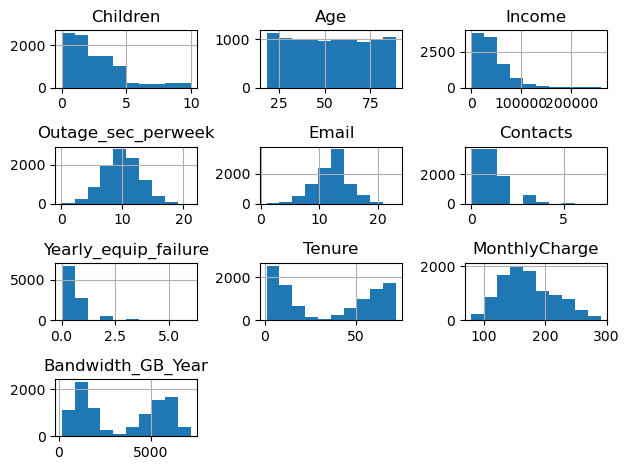

In [119]:
#i perform univariate analysis with histograms
churn_df[['Children', 
          'Age' , 
          'Income' , 
          'Outage_sec_perweek' , 
          'Email' , 
          'Contacts' , 
          'Yearly_equip_failure' , 
          'Tenure' , 'MonthlyCharge' , 'Bandwidth_GB_Year']].hist()
mpl.savefig('churn_hists.jpg')
mpl.tight_layout()

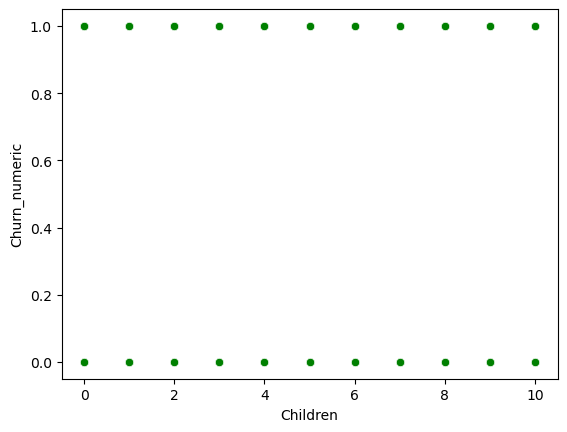

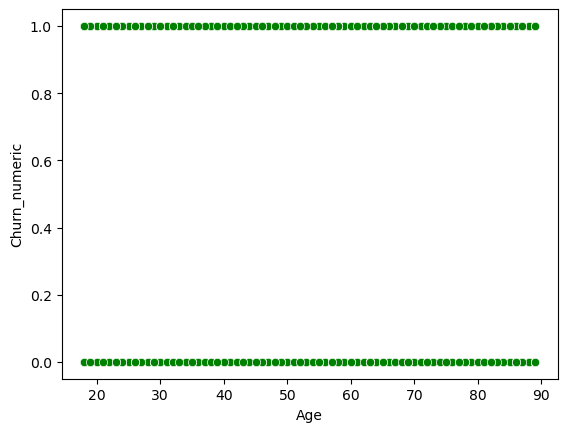

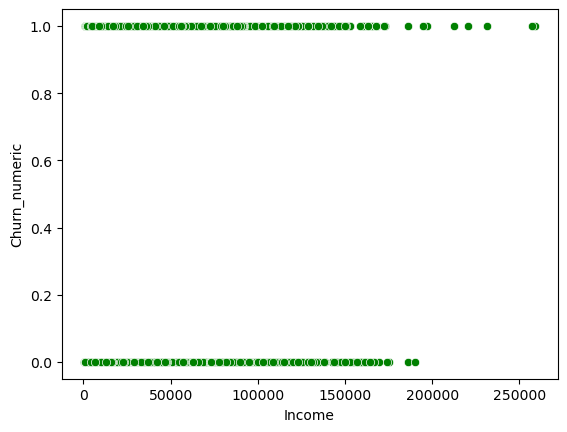

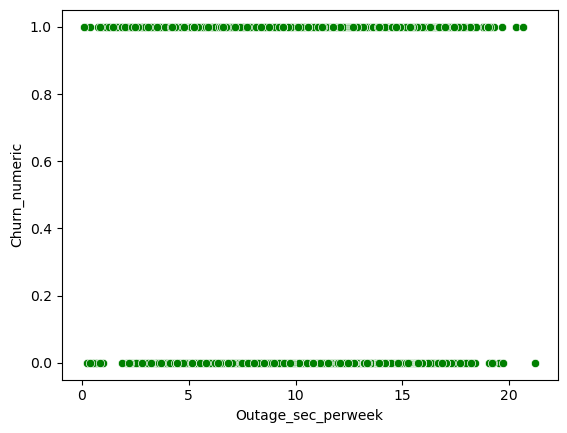

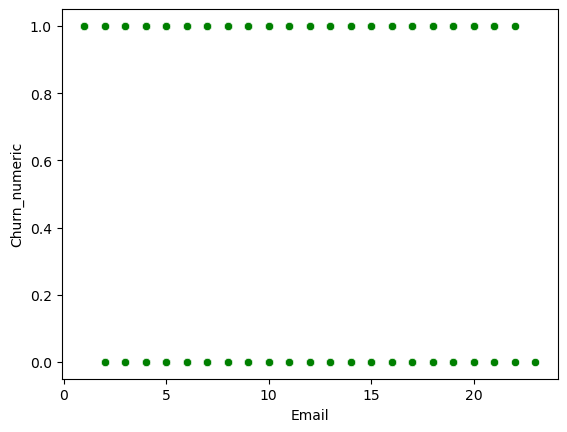

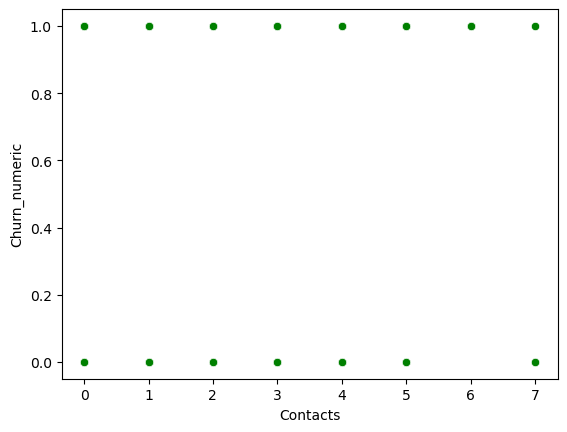

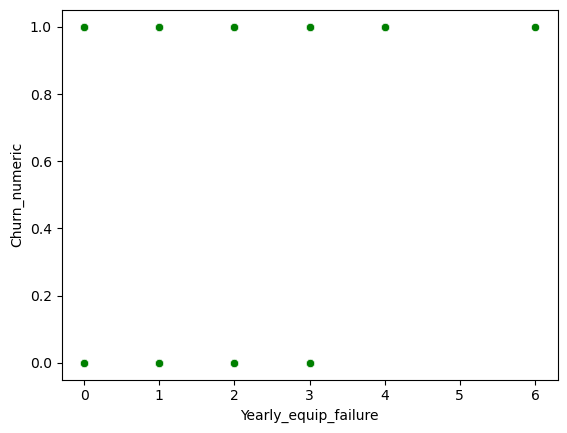

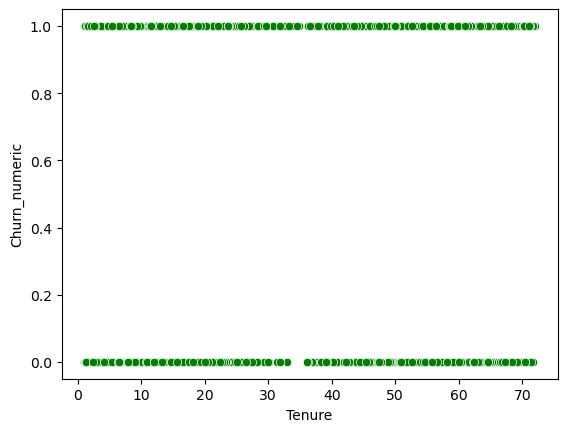

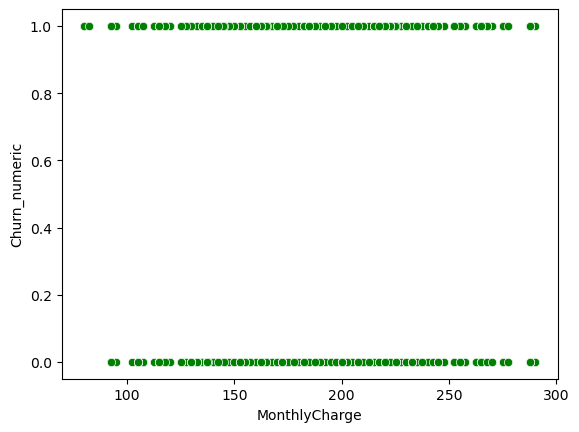

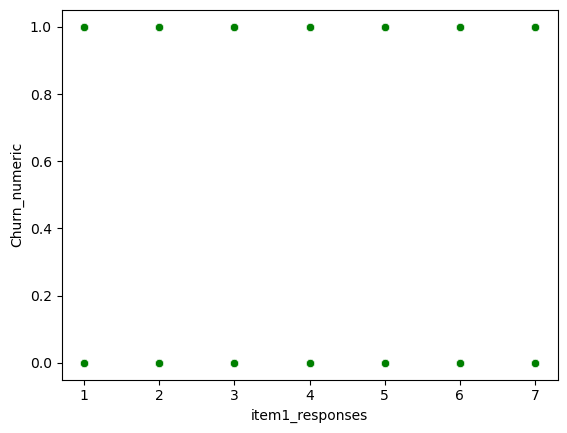

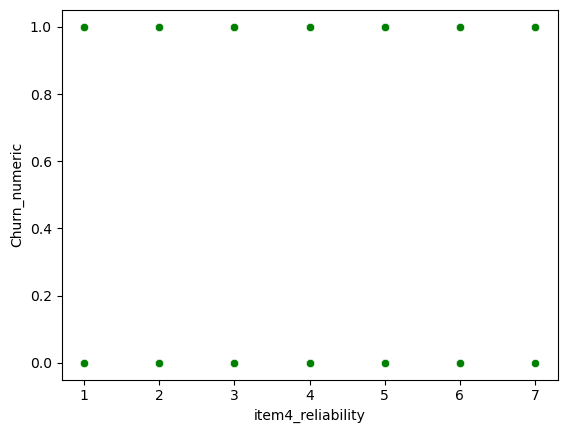

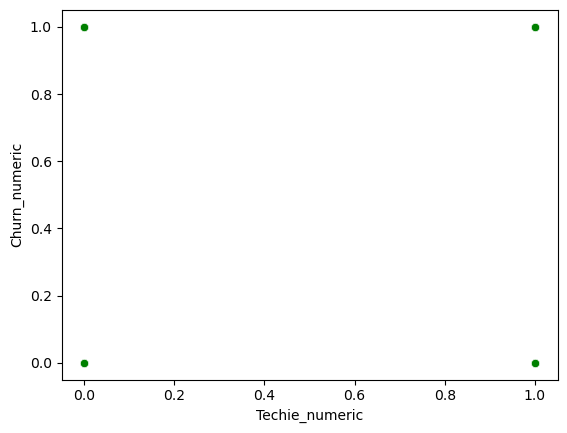

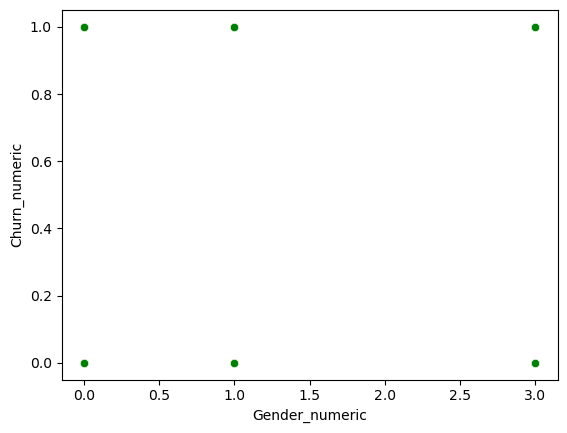

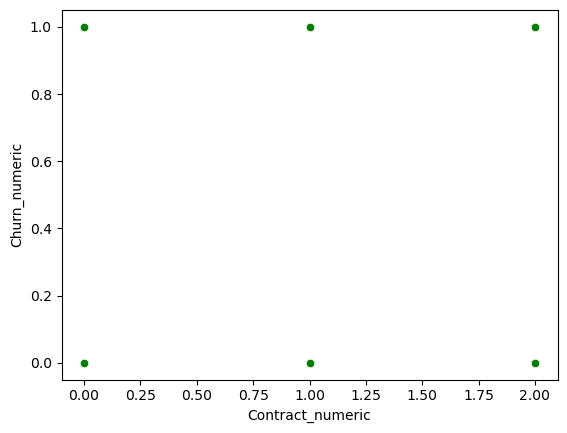

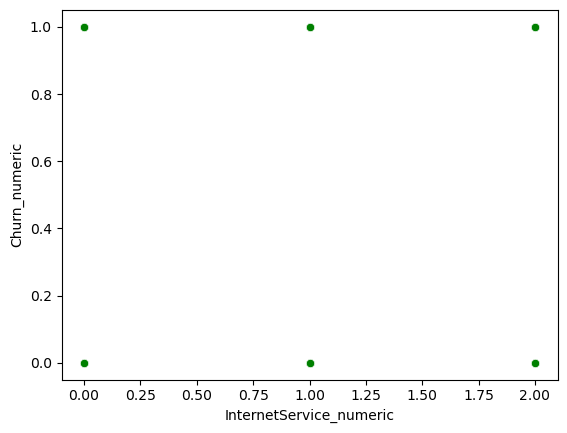

In [120]:
#i Perform bivariate analysis with our target variable, churn, through scatterplots
sb.scatterplot(x=churn_df['Children'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Age'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()

sb.scatterplot(x=churn_df['Income'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Email'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contacts'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item1_responses'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item4_reliability'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Techie_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Gender_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contract_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['InternetService_numeric'], y=churn_df['Churn_numeric'],
                color='green')
mpl.show()

In [121]:
#i: List features for analysis
Features = (list(churn_df.columns[:-1]))
print('Features for analysis include: \n', Features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1_responses', 'item2_fixes', 'item3_replacements', 'item4_reliability', 'item5_options', 'item6_respectfulness', 'item7_courteous', 'item8_listening', 'Churn_numeric', 'Area_numeric', 'Marital_numeric', 'Gender_numeric', 'Contract_numeric', 'PaymentMethod_numeric', 'InternetService_numeric', 'Techie_numeric', 'Port_modem_numeric', 'Tablet_numeric', 'Phone_numeric', 'Multiple_numeric', 'OnlineSecurity_numeric', 'OnlineBackup_numeric', 'DeviceProtection_numeric', 'TechSupport_numeric', 'StreamingTV_numeric', 'StreamingMovies_numeric']


In [122]:
#Set our new cleaned data file as our dataframe
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D209\churn_Task1.csv')

In [123]:
#j: Set predictor features & target variable
X = churn_df.drop('Churn_numeric', axis=1).values
y = churn_df['Churn_numeric'].values

In [124]:
#k: Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =1)

In [125]:
#k: Export X_train dataset
X_train_df = pd.DataFrame(X_train)
X_train_df.to_csv(r'C:\Users\seans\Documents\WGU\D209\Task1_X_train.csv')

In [126]:
#k: Export X_test dataset
X_test_df = pd.DataFrame(X_test)
X_test_df.to_csv(r'C:\Users\seans\Documents\WGU\D209\Task1_X_test.csv')

In [127]:
#k: Export y_train dataset
y_train_df = pd.DataFrame(y_train)
y_train_df.to_csv(r'C:\Users\seans\Documents\WGU\D209\Task1_Y_train.csv')

In [128]:
#k: Export y_test dataset
y_test_df = pd.DataFrame(X_test)
y_test_df.to_csv(r'C:\Users\seans\Documents\WGU\D209\Task1_Y_test.csv')

In [129]:
#l: Initialize KNN model 
knn = KNeighborsClassifier(n_neighbors = 7)

In [130]:
#l: Fit data to KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [131]:
#l: Predict outcomes from test set
y_pred = knn.predict(X_test)

In [132]:
#l: Export y_pred dataset
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv(r'C:\Users\seans\Documents\WGU\D209\Task1_Y_pred.csv')

In [133]:
#m: Print initial accuracy score of KNN model
print('KNN Initial Accuracy: ', accuracy_score(y_test, y_pred))

KNN Initial Accuracy:  0.7263333333333334


In [134]:
#m: Compute classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46       826
           1       0.79      0.84      0.82      2174

    accuracy                           0.73      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.71      0.73      0.72      3000



In [135]:
#m: Set steps for pipeline object
steps = [('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier())]

In [136]:
#m: Initiate pipeline
pipeline = Pipeline(steps)

In [137]:
#m: Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [138]:
#n: Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

In [139]:
#n: Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [140]:
#n: Print new accuracy score of scaled KNN model
print('KNN model New accuracy (scaled): {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

KNN model New accuracy (scaled): 0.801


              precision    recall  f1-score   support

           0       0.66      0.60      0.63       558
           1       0.85      0.88      0.86      1442

    accuracy                           0.80      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.80      0.80      0.80      2000

[[ 349  477]
 [ 344 1830]]


<AxesSubplot:>

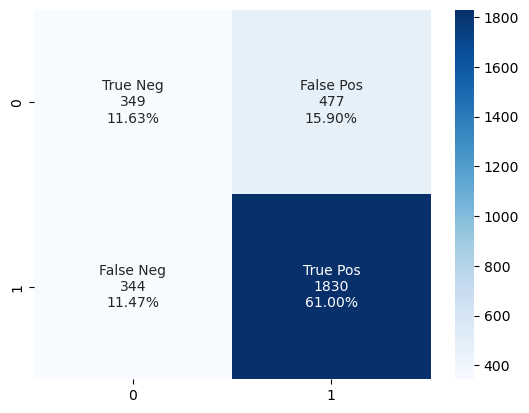

In [141]:
#n: Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

#Confusion_matrix & generate results
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# Visual confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [142]:
#n: Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Re-initializing KNN for cross validation
knn = KNeighborsClassifier()
# Initializing GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)
# Fit model to 
knn_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

Best parameters for this KNN model: {'n_neighbors': 31}


In [143]:
#n: Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for this KNN model: 0.735


In [144]:
#n: Fit it to the data
knn_cv.fit(X, y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

In [145]:
#n: Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

The Area under curve (AUC) on validation dataset is: 0.8062


In [146]:
#n: Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

In [147]:
#n:Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.68222821 0.17760236 0.96643691 0.98773457 0.58834745]


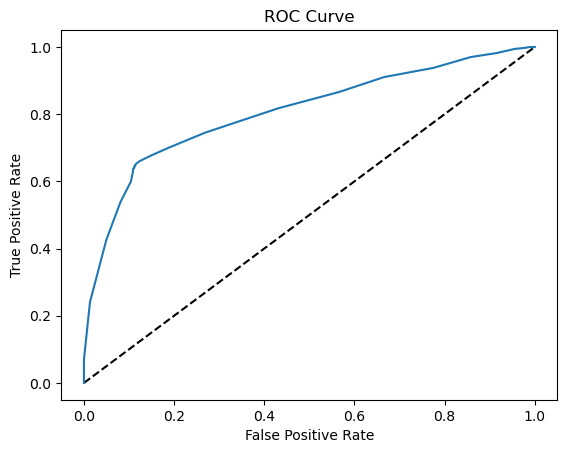

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
mpl.plot([0, 1], [0, 1], 'k--')
mpl.plot(fpr, tpr)
mpl.xlabel('False Positive Rate')
mpl.ylabel('True Positive Rate')
mpl.title('ROC Curve')
mpl.show()